In [1]:
import json 
import pandas as pd

Load the annotations that we downloaded

In [2]:
data = json.load(open('./Bible_annotations.json'))

For convenience, extract the Examples from the dataset. Each example contains its annotations

In [3]:
examples = data["dataset"]["examples"]

We'll use Pandas json_normalize function to "normalize" the annotations. 
We pass it the examples, tell it to "open up" the annotations field, and keep the "content" field so we can see
the text that was annotated. 

In [7]:
Annotations = pd.io.json.json_normalize(examples,'annotations','content')

Lets take a look at what came out

In [11]:
Annotations.head()

,annotator,end,example_id,id,start,tag,value,content
0,lighttag,64,fb503d56ab2c457f96361ee306e39eb1,77f4fd6056534e098179b9b03e6a27fc,60,God,LORD,Now the sons of Eli were sons of Belial; they...
1,lighttag,40,fb503d56ab2c457f96361ee306e39eb1,e21955d99d5a425c8d6e9c55768b355c,34,Pagan God,Belial,Now the sons of Eli were sons of Belial; they...
2,lighttag,20,fb503d56ab2c457f96361ee306e39eb1,eddb43b35fa8419296c6cc715a743e50,17,Person,Eli,Now the sons of Eli were sons of Belial; they...
3,lighttag,147,96fae26ab94244b2a5662f2d258e002b,ef31962aa9e94274a572d8ceb8a03df4,141,Place,Shiloh,"And he struck it into the pan, or kettle, or ..."
4,tirzape,84,4b9384ff5bec475189fb1249e8455640,23a7a0455ed640659f7e87be2629de97,83,God,I,"And there came a man of God unto Eli, and sai..."


Sometimes its convenient to "group together" all the annoations that belong to the same content. We can use Pandas
set_index function

In [12]:
Annotations.set_index(["content","example_id"]).sort_index().head(50)

annotator  \
content                                            example_id                                   
 According to all the works which they have don... ba82cb4349f7441cbb9d4ebe43fb0067       Tal   
 And David said unto his men, Gird ye on every ... a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
                                                   a437a32ed1bd4c84b410b9172b58f890   tirzape   
 And David sware moreover, and said, Thy father... 33f826ab61a24e1db60eb9bd3b0822aa  lighttag   
                                                   33f826ab61a24e1db60eb9bd3b0822aa  lighttag   
                                                   33f826ab61a24e1db60eb9bd3b0822aa  lighttag   
 And I will go out and stand beside my father i... 2742245bd54047c68220106985115fde       Tal   
                                                   2742245bd54047c68220106985115fde       Tal   
 And Jonathan spake good of David unto Saul his... 3888b56310e4431a888cc4289402bb1f       Tal   
                                                   3888b56310e4431a888cc4289402bb1f       Tal   
                                                   3888b56310e4431a888cc4289402bb1f       Tal   
                                                   3888b56310e4431a888cc4289402bb1f       Tal   
 And Jonathan stripped himself of the robe that... 8ed8c3c8f0e9425dbf71979ca8c23857       Tal   
 And Samuel died; and all the Israelites were g... d297e1e0c6444e69a997481ec15a3b3a       Tal   
 And Samuel grew, and the LORD was with him, an... d3f2ea6f5ffb4210872f72d2add0e61d   tirzape   
                                                   d3f2ea6f5ffb4210872f72d2add0e61d   tirzape   
                                                   d3f2ea6f5ffb4210872f72d2add0e61d   tirzape   
                                                   d3f2ea6f5ffb4210872f72d2add0e61d   tirzape   
                                                   d3f2ea6f5ffb4210872f72d2add0e61d   tirzape   
                                                   d3f2ea6f5ffb4210872f72d2add0e61d   tirzape   
                                                   d3f2ea6f5ffb4210872f72d2add0e61d   tirzape   
                                                   d3f2ea6f5ffb4210872f72d2add0e61d   tirzape   
 And Samuel said, Hath the LORD as great deligh... b995ced89ab344b39d914e51064a0461       Tal   
                                                   b995ced89ab344b39d914e51064a0461       Tal   
                                                   b995ced89ab344b39d914e51064a0461       Tal   
 And Samue

In [31]:
TT = Annotations.pivot_table(index="tag",columns="value",values="start",aggfunc=len).fillna(0)

In [28]:
Annotations

,annotator,end,example_id,id,start,tag,value,content
0,lighttag,64,fb503d56ab2c457f96361ee306e39eb1,77f4fd6056534e098179b9b03e6a27fc,60,God,LORD,Now the sons of Eli were sons of Belial; they...
1,lighttag,40,fb503d56ab2c457f96361ee306e39eb1,e21955d99d5a425c8d6e9c55768b355c,34,Pagan God,Belial,Now the sons of Eli were sons of Belial; they...
2,lighttag,20,fb503d56ab2c457f96361ee306e39eb1,eddb43b35fa8419296c6cc715a743e50,17,Person,Eli,Now the sons of Eli were sons of Belial; they...
3,lighttag,147,96fae26ab94244b2a5662f2d258e002b,ef31962aa9e94274a572d8ceb8a03df4,141,Place,Shiloh,"And he struck it into the pan, or kettle, or ..."
4,tirzape,84,4b9384ff5bec475189fb1249e8455640,23a7a0455ed640659f7e87be2629de97,83,God,I,"And there came a man of God unto Eli, and sai..."
5,tirzape,128,4b9384ff5bec475189fb1249e8455640,10a94055c12344b4b76b167fc89bebc7,122,Person,father,"And there came a man of God unto Eli, and sai..."
6,tirzape,56,4b9384ff5bec475189fb1249e8455640,cca2583de9b34b02b2860c9d8cc39f2a,53,Person,him,"And there came a man of God unto Eli, and sai..."
7,tirzape,38,4b9384ff5bec475189fb1249e8455640,96ab20df4559471b9e98f1b94e907819,34,Person,"Eli,","And there came a man of God unto Eli, and sai..."
8,tirzape,21,4b9384ff5bec475189fb1249e8455640,97971cb6bf054b87944da69a3414bd29,18,Person,man,"And there came a man of God unto Eli, and sai..."
9,tirzape,166,4b9384ff5bec475189fb1249e8455640,52f55958717b4ef78cf14b14716f1f50,156,Person,Pharaoh's,"And there came a man of God unto Eli, and sai..."


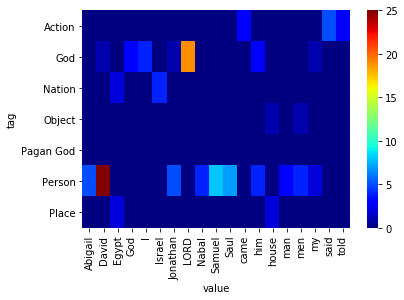

In [39]:
import seaborn as sns
sns.heatmap(TT.T[TT.sum()>2].T,cmap='jet')